In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets, linear_model

In [2]:
rho = 1000
plastic_density = 1300
plastic_critical_stress = 0
plastic_coefficient = 1e-2

In [3]:
tau = np.logspace(-4, 1, 10)
Di = 1e-4
s = (plastic_density - rho) / rho
theta = tau / (plastic_density * s * 9.8 * Di)

print(theta)

[2.61643119e-04 9.40296615e-04 3.37925082e-03 1.21443978e-02
 4.36447027e-02 1.56850929e-01 5.63693012e-01 2.02580765e+00
 7.28037520e+00 2.61643119e+01]


In [4]:
dt = 1e-3
qsstar = plastic_coefficient * np.power(theta - plastic_critical_stress, 1.5) * dt

In [5]:
print(qsstar)

[4.23217849e-11 2.88334964e-10 1.96440324e-09 1.33833235e-08
 9.11795216e-08 6.21198849e-07 4.23217849e-06 2.88334964e-05
 1.96440324e-04 1.33833235e-03]


In [6]:
qs = qsstar * np.power(s * 9.8 * Di, 0.5)
print(qs)

[7.25667447e-13 4.94391476e-12 3.36824992e-11 2.29476196e-10
 1.56340312e-09 1.06513415e-08 7.25667447e-08 4.94391476e-07
 3.36824992e-06 2.29476196e-05]


In [7]:
df = pd.read_csv('./data/berzi.csv', delimiter=',')

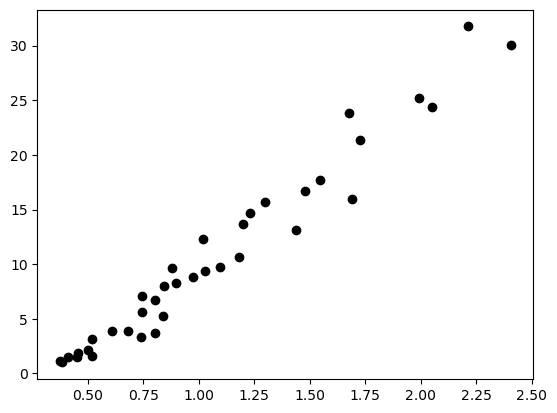

In [8]:
plt.figure()
plt.plot(df['theta'], df['q'], 'ok')
plt.show()

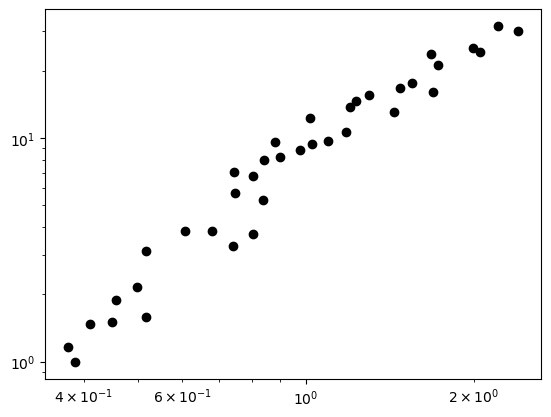

In [9]:
plt.figure()
plt.loglog(df['theta'], df['q'], 'ok')
plt.show()

In [10]:
df['qstar'] = df['q'] / np.sqrt(0.51 * 9.8 * 3.35)

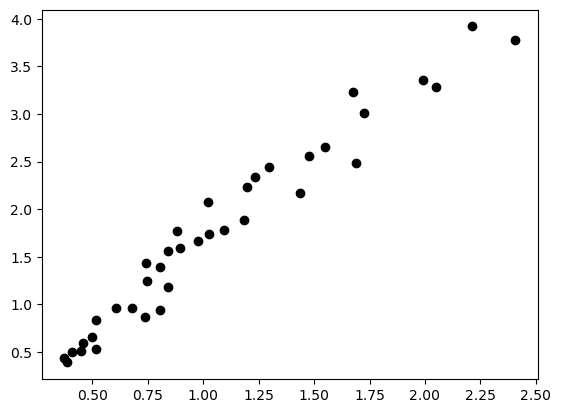

In [11]:
plt.figure()
plt.plot(df['theta'], np.power(df['qstar'], 2/3), 'ok')
plt.show()

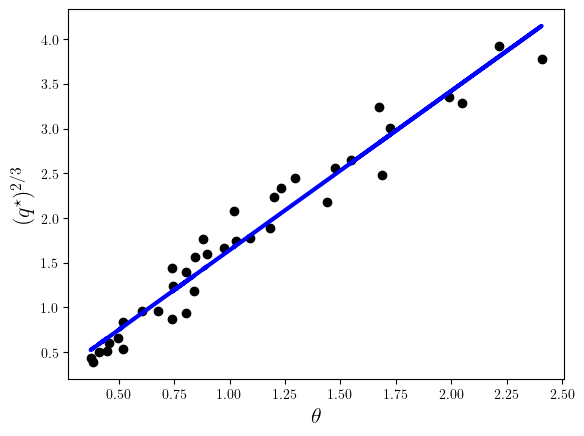

In [16]:
x = df['theta'].values
y = np.power(df['qstar'].values, 2/3)

length = len(df)

x = x.reshape(length, 1)
y = y.reshape(length, 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)

plt.rcParams['text.usetex'] = True

# plot it as in the example at http://scikit-learn.org/
plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.xlabel('$\\theta$', fontsize=16)
plt.ylabel('$(q^{\star})^{2/3}$', fontsize=16)
plt.savefig('plots/MPM-plastic.png', dpi=300)
plt.show()

In [13]:
regr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [14]:
Cb = regr.coef_
C = np.power(Cb, 1.5)
print(C)

[[2.37830971]]
